# Hearing Threshold Clustering with GMM - Long

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data
file_path = "../data/nhanes_1520_age.csv"
data = pd.read_csv(file_path)
data.set_index('SEQN', inplace=True)
print(data.shape)
data.head()

(9729, 15)


,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL,RIDAGEYR
SEQN,,,,,,,,,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0,5.0,5.0,5.0,35.0,50.0,50.0,55.0,62
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0,5.0,20.0,50.0,55.0,60.0,55.0,60.0,53
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0,15.0,25.0,30.0,30.0,45.0,60.0,50.0,56
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0,15.0,10.0,15.0,25.0,15.0,25.0,20.0,42
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0,0.0,-5.0,0.0,5.0,-5.0,10.0,10.0,22


In [3]:
# Select the columns for right ear measurements

right_ear_columns = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
right_ear_data = data[right_ear_columns]
right_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Select the columns for left ear measurements

left_ear_columns = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
left_ear_data = data[left_ear_columns]
left_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Concatenate the right and left ear data

ear_data = pd.concat([right_ear_data, left_ear_data], axis=0)

# Change the column names to be more descriptive

ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0
...,...,...,...,...,...,...,...
124797,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
124799,20.0,40.0,45.0,45.0,60.0,85.0,666.0
124811,35.0,30.0,15.0,30.0,25.0,55.0,60.0


In [4]:
# Process missing values
cleaned_ear_data = ear_data.replace({888: np.nan, 666: np.nan, '.': np.nan}, inplace=False)
cleaned_ear_data = cleaned_ear_data.dropna(inplace=False)
# cleaned_ear_data.reset_index(drop=True, inplace=True)

cleaned_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0
...,...,...,...,...,...,...,...
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0
124786,0.0,10.0,10.0,5.0,0.0,15.0,0.0
124787,20.0,10.0,5.0,5.0,5.0,10.0,5.0


In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_ear_data)

scaled_data

array([[-0.08278503, -0.46716583, -0.48842561, ...,  0.59217122,
         0.10337954,  1.0352841 ],
       [-0.08278503,  0.3742576 ,  1.8583647 , ...,  2.06048192,
         1.48764244,  1.63519778],
       [ 1.30621995,  1.21568102,  1.18785319, ...,  1.08160812,
         0.79551099,  1.23525533],
       ...,
       [ 0.84321829, -0.04645412, -0.48842561, ..., -0.63142103,
        -0.58875191, -0.76445693],
       [ 2.23222327,  1.63639274,  0.18208591, ...,  0.34745277,
         1.48764244,  1.43522655],
       [-0.54578669,  0.3742576 ,  0.18208591, ...,  1.57104502,
         1.71835293,  2.03514023]])

# GMM with n clusters

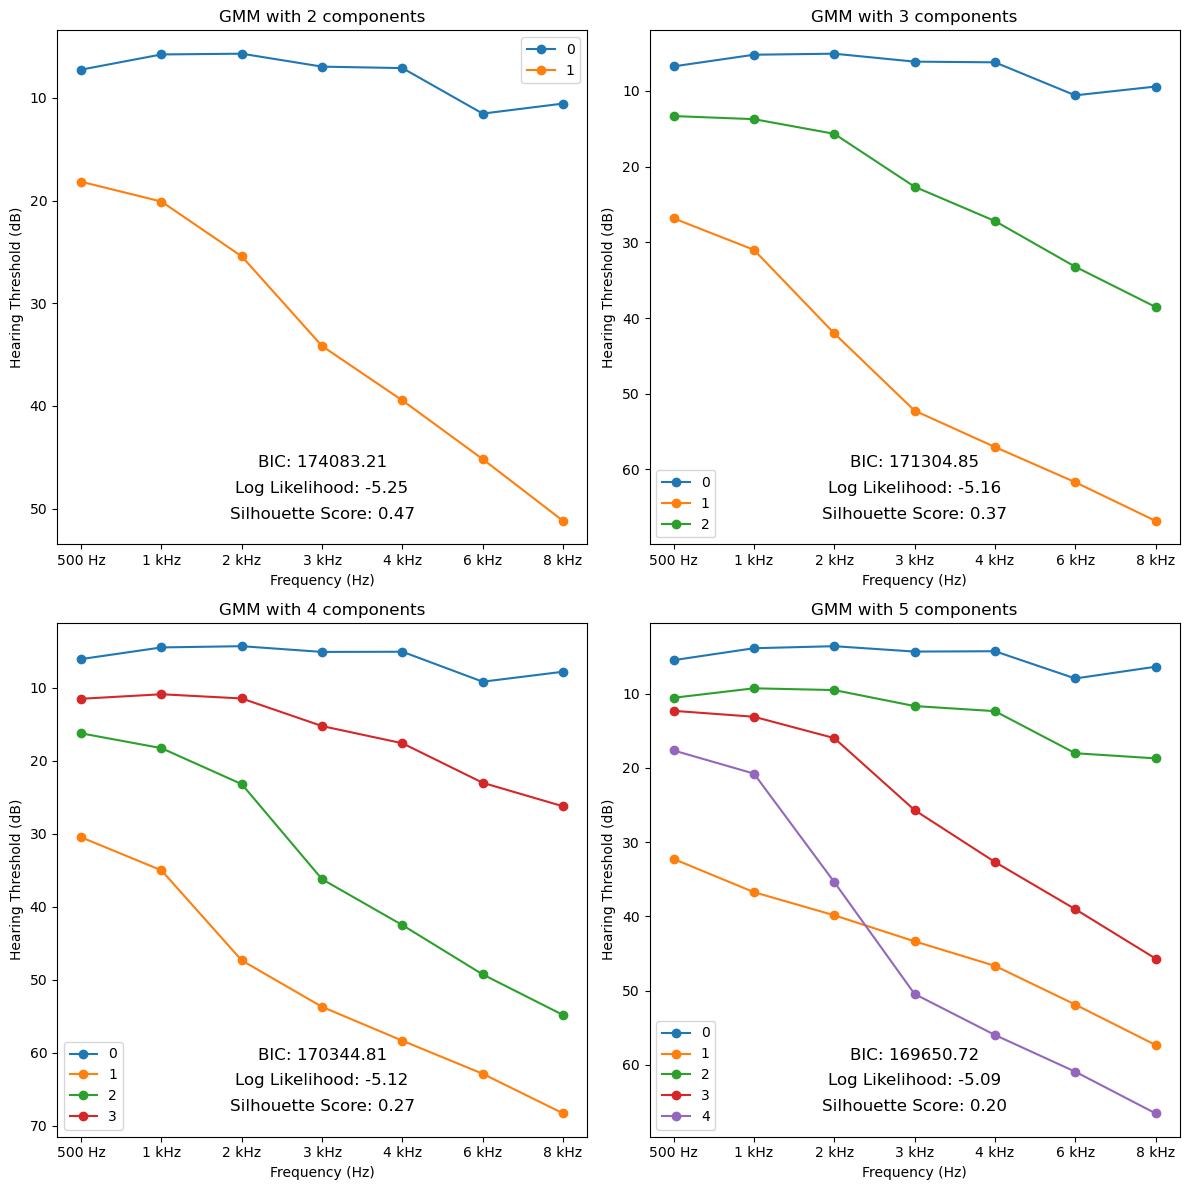

In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Fit the GMM algorithm with n components = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2, 6):
    # Initialize the GaussianMixture object
    gmm = GaussianMixture(n_components=i, random_state=42, covariance_type='full')
    gmm.fit(scaled_data)

    # Extract the means (centroids)
    centroids = scaler.inverse_transform(gmm.means_)
    centroids_df = pd.DataFrame(centroids, columns=cleaned_ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'GMM with {i} components')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Annotate the Silhouette Score
    labels = gmm.predict(scaled_data)
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(scaled_data, labels):.2f}', 
                          xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the Log Likelihood
    ax[row, col].annotate(f'Log Likelihood: {gmm.score(scaled_data):.2f}', 
                          xy=(0.5, 0.10), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the BIC
    ax[row, col].annotate(f'BIC: {gmm.bic(scaled_data):.2f}', 
                          xy=(0.5, 0.15), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# GMM on percentile data

In [7]:
# Replace original values with percentiles

ranked_ear_data = cleaned_ear_data.rank(method='average', pct=True)
ranked_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,0.553846,0.355542,0.358237,0.713598,0.780769,0.663598,0.820351
83733,0.553846,0.750636,0.933979,0.945033,0.940884,0.887038,0.894670
83735,0.913053,0.899758,0.884706,0.713598,0.845488,0.805966,0.843973
83736,0.553846,0.591217,0.563901,0.620654,0.462901,0.465657,0.574440
83741,0.302180,0.130103,0.358237,0.296941,0.296154,0.578134,0.477408
...,...,...,...,...,...,...,...
124784,0.983586,0.984737,0.964022,0.925227,0.897759,0.836130,0.965082
124786,0.099425,0.591217,0.563901,0.296941,0.137311,0.465657,0.118716
124787,0.853301,0.591217,0.358237,0.296941,0.296154,0.326560,0.229104


In [8]:
# Standardize the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(ranked_ear_data)

scaled_data

array([[ 0.1901051 , -0.50995881, -0.49761467, ...,  0.97938602,
         0.56944159,  1.11388132],
       [ 0.1901051 ,  0.88449155,  1.52292195, ...,  1.53796357,
         1.34732347,  1.37231611],
       [ 1.4590058 ,  1.4108041 ,  1.35000032, ...,  1.20516249,
         1.06508034,  1.19602441],
       ...,
       [ 1.24793244,  0.32183735, -0.49761467, ..., -0.71124344,
        -0.60391806, -0.94211802],
       [ 1.63884072,  1.52239433,  0.72325242, ...,  0.83073487,
         1.34732347,  1.28153747],
       [-0.69890635,  0.88449155,  0.72325242, ...,  1.38751635,
         1.43282933,  1.54766001]])

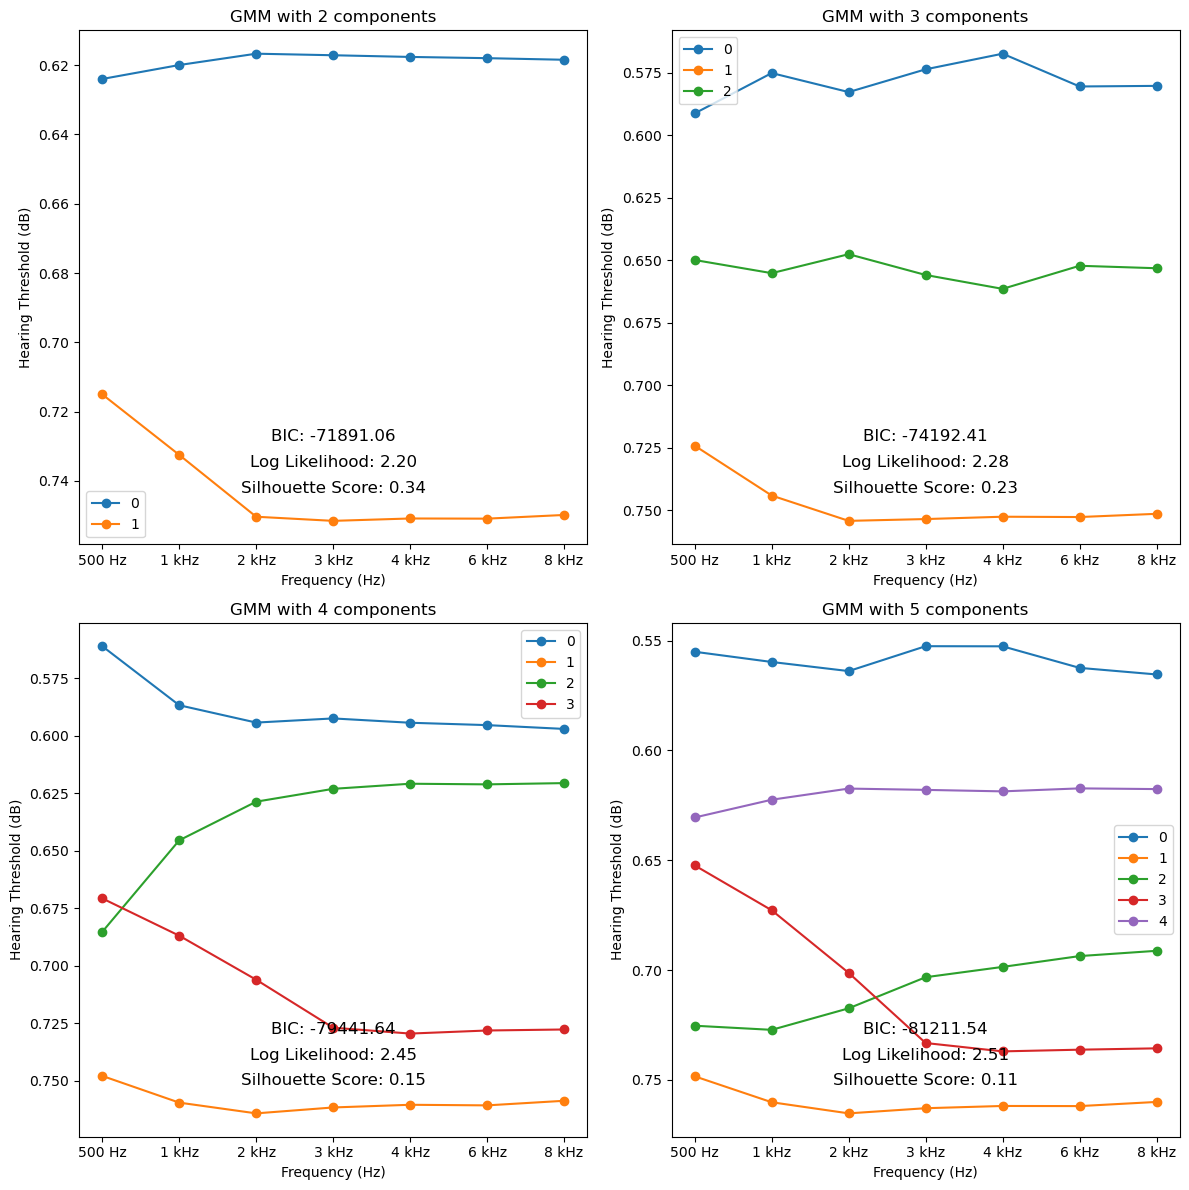

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Fit the GMM algorithm with n components = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2, 6):
    # Initialize the GaussianMixture object
    gmm = GaussianMixture(n_components=i, random_state=42, covariance_type='full')
    gmm.fit(ranked_ear_data)

    # Extract the means (centroids)
    centroids = scaler.inverse_transform(gmm.means_)
    centroids_df = pd.DataFrame(centroids, columns=cleaned_ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'GMM with {i} components')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Annotate the Silhouette Score
    labels = gmm.predict(ranked_ear_data)
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(ranked_ear_data, labels):.2f}', 
                          xy=(0.5, 0.10), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the Log Likelihood
    ax[row, col].annotate(f'Log Likelihood: {gmm.score(ranked_ear_data):.2f}', 
                          xy=(0.5, 0.15), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the BIC
    ax[row, col].annotate(f'BIC: {gmm.bic(ranked_ear_data):.2f}', 
                          xy=(0.5, 0.20), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()